<h1 style="font-size:50px; color:green;">Water Potability in Nigeria</h1>

<html>
    <head/>
    <body>
        <img src="girl3.jpg" alt="Nigeria girl drinking from tap water" height=30%/>
    </body>
</html>

<p style="font-size: 20px">
    Testing the potability of water (or simply verifying that a body of water is safe to drink) is a matter of great importance. Because water is an amazing solvent, the amount of impurity that can be contained in it is astounding, substances ranging from faecal matter to dissovle mineral element. Consuming such liquids can cause adverse effects on our health (even in long term!)
</p>
<p style="font-size: 20px">
    To this end, the Nigeria government has released specification (or standards) that any companies who produces and/or distribut drinking water must comply with, to ensure that the water when given to the masses are of the highest safety in not purity. This specifications follows those sets by the World Health Organization 9WHO) on drinking water.
</p>

<p style="font-size: 20px">
    This project seeks to expedite the treatment process of water by automating the classification stage of the water as drinkable making use of machine learning thereby reducing human errors
</p>

<h2>Importing modules</h4>

In [61]:
# Importing relevant modules

# number crunchers
import numpy as np
import pandas as pd

# numbers visualizer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

# ML model builders
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<h2>Loading and splitting dataset</h2>

In [2]:
# Set the Random state variable
random_state = 20

# legacy code, don't do this next time
np.random.seed(random_state)

data = pd.read_csv('Train.csv')
data.head()

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,region_area_1,3.716080,180.196811,18630.362669,6.330435,NaN,602.990359,15.285013,56.444076,4.500656,0
1,region_area_100,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,region_area_1000,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0
3,region_area_1001,NaN,261.753637,21174.713291,7.314074,NaN,582.848407,15.215849,90.367455,4.217553,0
4,region_area_1002,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0


In [34]:
# split the dataset into train and test dataset and perform analysis on only the train test
train, test = train_test_split(data, test_size=.2, random_state=random_state)
train.shape, test.shape

((1808, 11), (452, 11))

<h2>Analyzing Dataset</h2>

<p style="font-size:20px">
    Won't go deep into analysis of the dataset, I will briefly show the distribution of the features as an individual and in relation to other features
</p>

In [4]:
missing_values = train.isna().sum()
actual_values = len(train) - missing_values

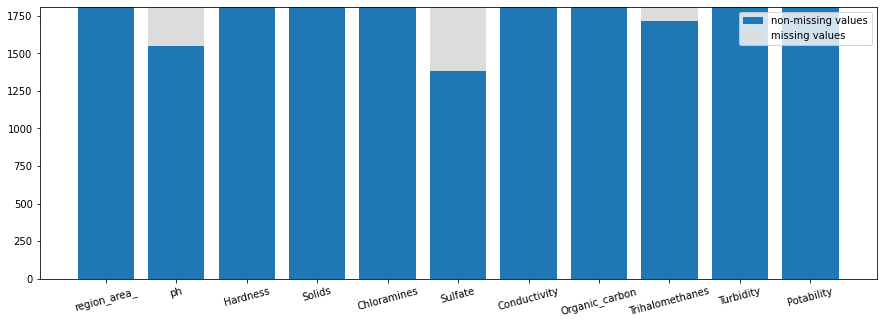

In [5]:
plt.figure(figsize=(15, 5))
actual_bar = plt.bar(actual_values.index, actual_values.values, label='non-missing values')
missing_bar = plt.bar(actual_values.index, missing_values.values, bottom=actual_values.values, color='#DCDCDC', label='missing values')
axe = plt.gca()
plt.setp(axe.get_xticklabels(), rotation=15)
plt.legend()

In [7]:
# Standard values according to Nigeria
ph_min = 6.52
ph_max = 6.83

solids = 1000
chloramines = 5
conductivity = 400
trihalomethanes = 80
turbidity = 5

nig_standards = pd.DataFrame({
    'ph': [6.52, 6.83], 'Chloramines': [0, 5], 'Conductivity': [0, 400], 'Trihalomethanes': [0, 80], 'Turbidity': [0, 5]},
    index=['Low', 'High'])
nig_standards

,ph,Chloramines,Conductivity,Trihalomethanes,Turbidity
Low,6.52,0,0,0,0
High,6.83,5,400,80,5


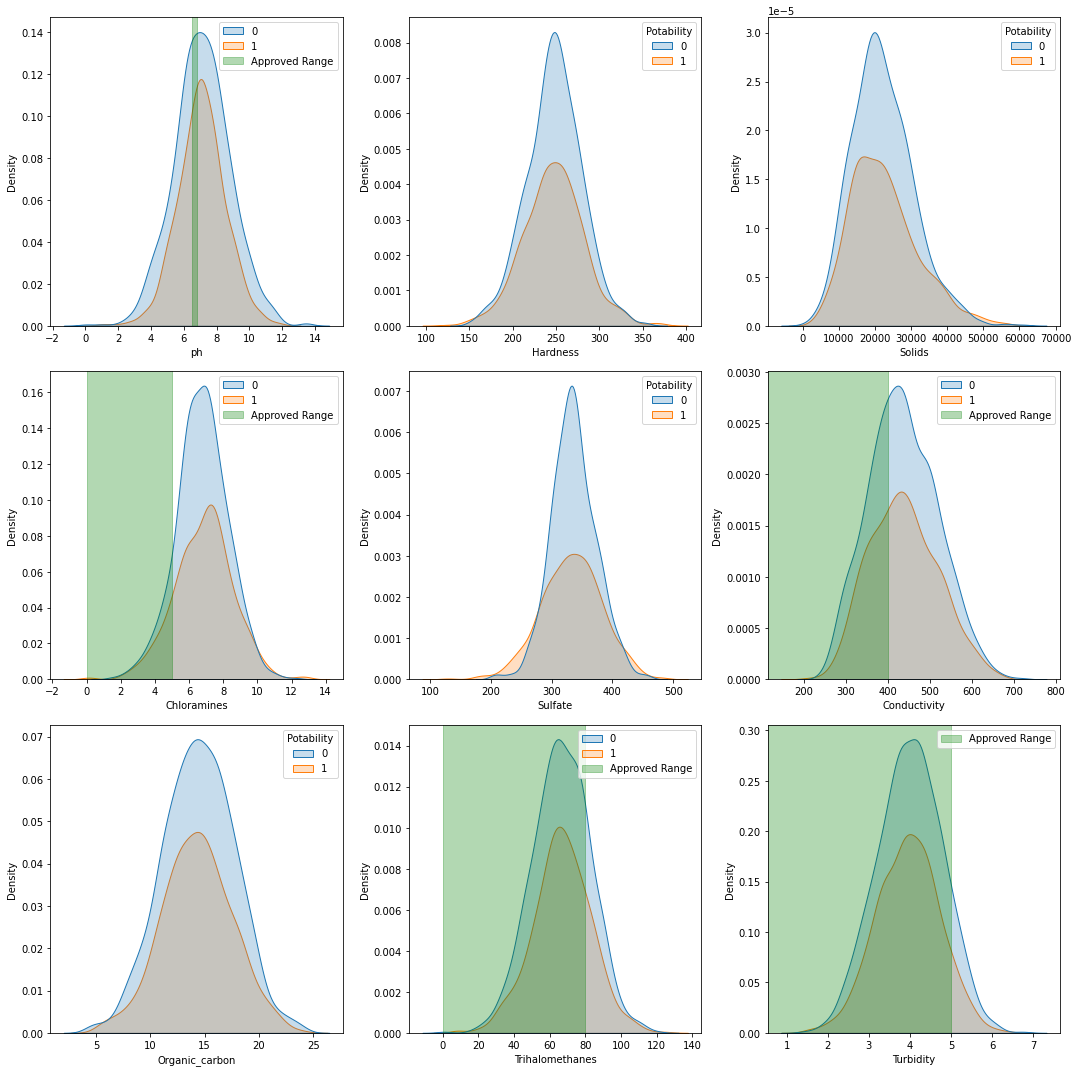

In [ ]:
# group the dataset by Potability for more comparison anaylsis
# train_group = train.groupby(by='Potability',
fig, axe = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for ax, col in zip(axe.ravel(), train.columns[1:-1]):
    sns.kdeplot(train[col], fill=True, hue=train['Potability'], ax=ax)
    primitives = ax.get_children()

    if col in nig_standards:
        low, high = nig_standards[col][0], nig_standards[col][1]
        handle = ax.add_patch(Rectangle((low, 0), width=high-low, height=1,  alpha=0.3, color='green', label="Approved Range"))
        ax.legend([primitives[1], primitives[0], handle], ['0', '1', 'Approved Range'])
plt.legend()
plt.tight_layout()

<p style="font-size:20px">From this we can see that any model we choose is going to have a hard time separating both classes. Also some of the features have samples that are outside of the standard set by Nigera and surprisingly still classified as potable</p>

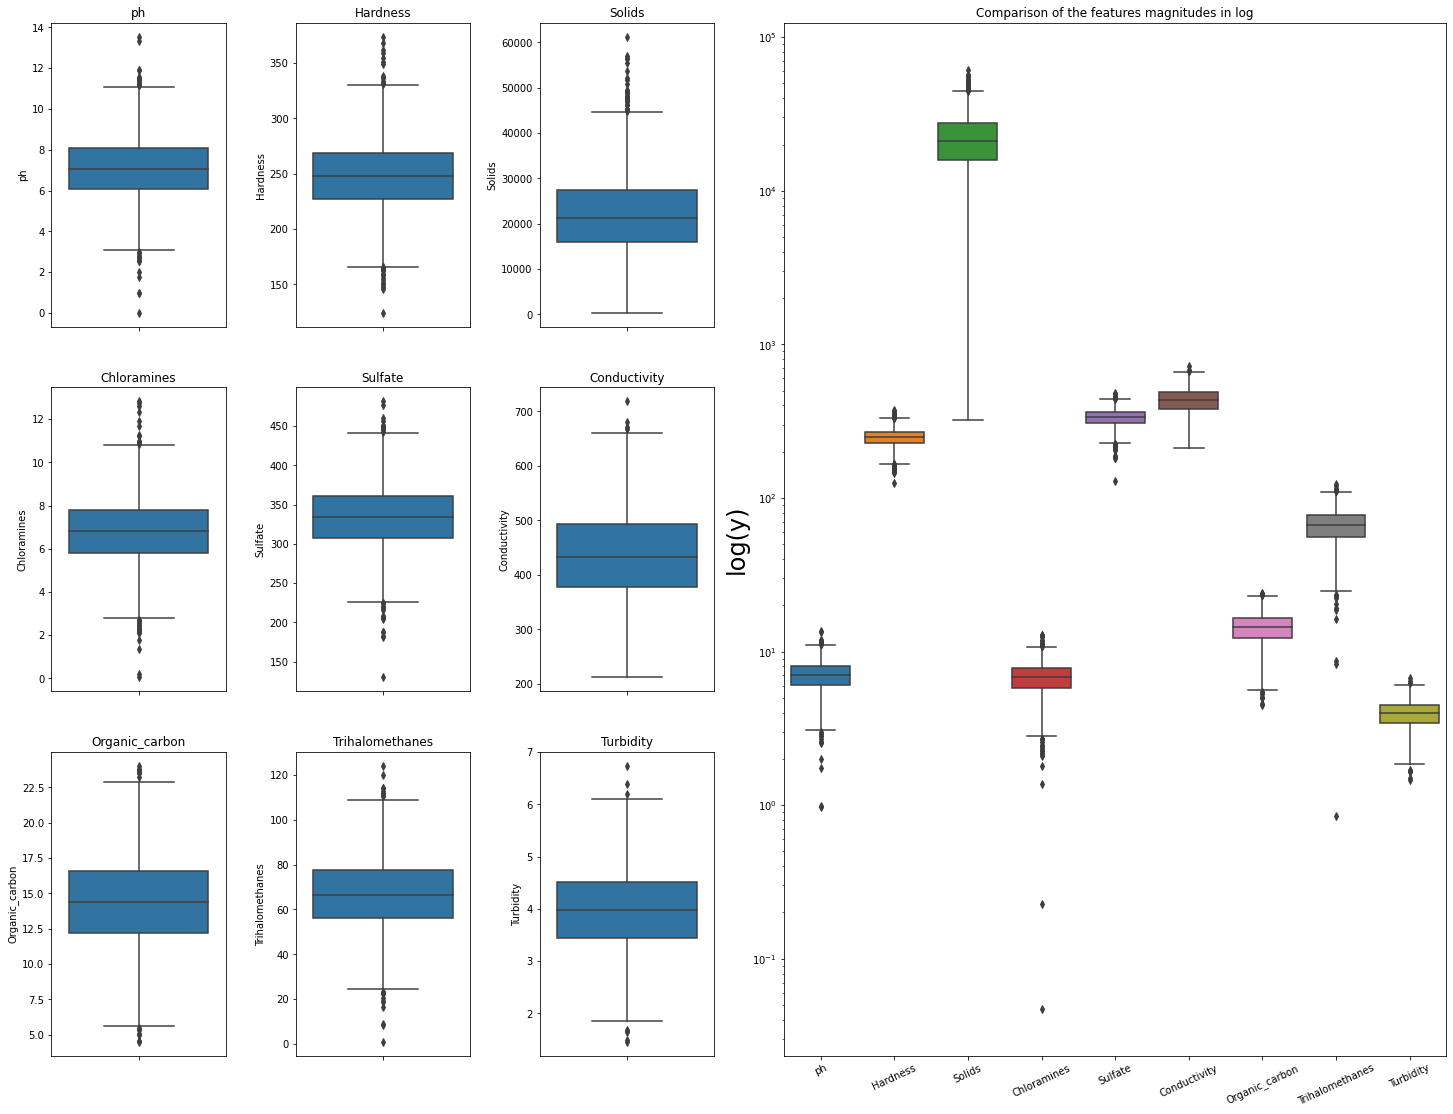

In [ ]:
fig = plt.figure(figsize=(25, 19))
spec = gridspec.GridSpec(nrows=3, ncols=6, wspace=0.4)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])

ax5 = fig.add_subplot(spec[1, 0])
ax6 = fig.add_subplot(spec[1, 1])
ax7 = fig.add_subplot(spec[1, 2])
ax8 = fig.add_subplot(spec[2, 0])
ax9 = fig.add_subplot(spec[2, 1])
ax10 = fig.add_subplot(spec[2, 2])

combined_plot = fig.add_subplot(spec[0:, 3:])

axe = (ax1, ax2, ax3, ax5, ax6, ax7, ax8, ax9, ax10)

for col, ax in zip(train.columns[1: -1], axe):
    sns.boxplot(y=train[col], ax=ax)
    ax.set_title(col)
ax = sns.boxplot(data=train.drop('Potability', axis='columns'), ax=combined_plot)
ax.set_yscale('log')
ax.set_ylabel("log(y)", fontsize=24)
ax.set_title('Comparison of the features magnitudes in log')

_ = plt.setp(ax.get_xticklabels(), rotation=25)

<p style="font-size:20px">
    From the above plot the dataset is not evenly scaled, with some features an order of magnitude larger than others, and therefore have to be scaled 
</p>

<h3>Defining utilities functions</h3>

<p style="font-size: 20px;">These utilities functions serve dual purpose. Firstly, preventing clutters of variables in my global scope. Secondly, they are quick and handy tool for performing group of task that are frequently executed</p>

In [35]:
def drop_unwanted_feature(df: pd.DataFrame, features: list):
    """Returns a copy of the dataframe with the features listed"""
    return df.drop(features, axis='columns')

In [36]:
def fill_missing(df: pd.DataFrame, value: dict):
    """Return a copy of the dataset with the missing value
    already filled with the values specifies in the dict
    """
    return df.fillna(value)
    

In [37]:
def scale_transform_features(df: pd.DataFrame, action='scale', scaler=None) -> np.ndarray:
    """Scale and/or transform the features to the same dimension, depending on the action
    returning the scaled feature"""
    if action == 'scale':
        if scaler is None:
            scaler = StandardScaler()
        return scaler.fit_transform(df.to_numpy())
    elif action == 'transform':
        if scaler == None:
            raise ValueError("A scaler object is unavailable")
        else:
            return scaler.transform(df.to_numpy())

In [39]:
target = train['Potability']
train = drop_unwanted_feature(train, features=['region_area_', 'Potability'])

# fill in missing values with their feature mean
features_mean = {feature: train[feature].mean() for feature in train}
train = fill_missing(train, value=features_mean)

In [40]:
scaler = StandardScaler()
train_scaled = scale_transform_features(train, action='scale', scaler=scaler)
train_scaled.shape

(1808, 9)

Text(0.5, 1.0, 'Scaled features still retaining their unique characteristics')

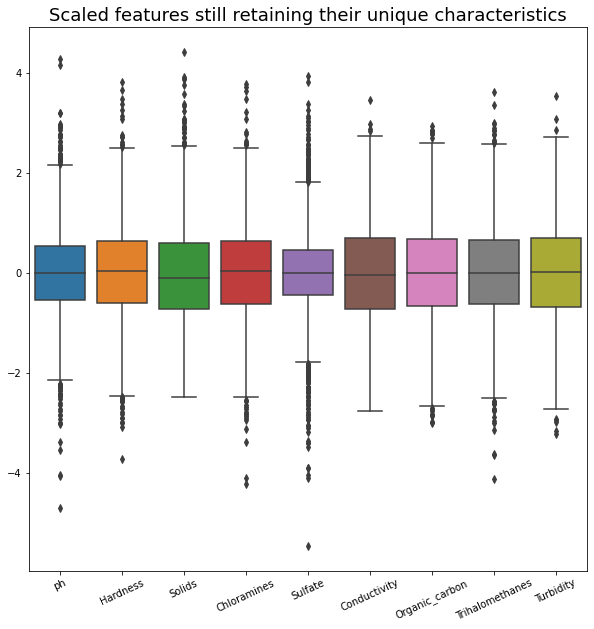

In [41]:
plt.figure(figsize=(10, 10))
axe = sns.boxplot(data=train_scaled)
axe.set_xticklabels(train.columns)
_ = plt.setp(axe.get_xticklabels(), rotation=25)
axe.set_title('Scaled features still retaining their unique characteristics', fontsize=18)

<h2>Build model</h2>

In [59]:
class ModelTrainer:
    def __init__(self, models: list):
        """Performs cross validation on models passed as arguments and saving a summary of the result"""
        self.__models = models
        self.__scores = {'Mean Score': []}
        self.__indexes = []
        
    def __call__(self, x_train, y_train) -> None:
        for model in self.__models:
            model_name = str(model).strip('()')
            print(model_name)
            
            result = cross_validate(model, x_train, y_train, scoring='accuracy', cv=ShuffleSplit(n_splits=5, test_size=0.25, random_state=random_state))
            
            print("Scores: -->", result['test_score'])
            print("Mean Score: -->", result['test_score'].mean(), end='\n\n')
            
            self.__indexes.append(model_name)
            self.__scores['Mean Score'].append(result['test_score'].mean())
            
    def set_models(self, models: list):
        self.__models = models
            
    def summary(self) -> pd.DataFrame:
        ranking = pd.DataFrame(self.__scores, index=self.__indexes)
        return ranking

In [ ]:
def setup_models():
    """Initialize models with their default parameters"""
    # Trees models
    forest = RandomForestClassifier()
    booster = GradientBoostingClassifier()

    # linear models
    logreg = LogisticRegression()
    svc = SVC()
    
    # neighbors
    knn = KNeighborsClassifier()
    
    return [forest, booster, logreg, svc, knn]

<h3>Base-line Models</h3>

In [19]:
model_trainer = ModelTrainer(setup_models())
model_trainer(train_scaled, target.to_numpy())

RandomForestClassifier
Scores: --> [0.63274336 0.64823009 0.66150442 0.64159292 0.63495575]
Mean Score: --> 0.6438053097345132

GradientBoostingClassifier
Scores: --> [0.63938053 0.61504425 0.66814159 0.62610619 0.61946903]
Mean Score: --> 0.6336283185840709

LogisticRegression
Scores: --> [0.61504425 0.62168142 0.60840708 0.58849558 0.59734513]
Mean Score: --> 0.6061946902654867

SVC
Scores: --> [0.65486726 0.67035398 0.67256637 0.65707965 0.65707965]
Mean Score: --> 0.6623893805309734

KNeighborsClassifier
Scores: --> [0.62831858 0.61725664 0.59734513 0.59734513 0.61946903]
Mean Score: --> 0.6119469026548672



In [20]:
model_trainer.summary()

,Mean Score
RandomForestClassifier,0.643805
GradientBoostingClassifier,0.633628
LogisticRegression,0.606195
SVC,0.662389
KNeighborsClassifier,0.611947


<p style="font-size: 20px;">Fine-tune the best performing baseline model to obtain the optimum parameters</p>

In [69]:
train_scaled.shape, target.to_numpy().shape

((1808, 9), (1808,))

In [71]:
# optimum parameters
svc = SVC(C=6.0, kernel='poly', degree=2, max_iter=9001)
svc = svc.fit(train_scaled, target.to_numpy())

c:\users\dell\machinelearning\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=9001).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


<h3>Preprocessing and making predictions on test set</h3>

In [43]:
target_test = test['Potability']
test = drop_unwanted_feature(test, ['region_area_', 'Potability'])
test = fill_missing(test, features_mean)

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.to_numpy())
test_scaled = scale_transform_features(test, action='transform', scaler=scaler)


In [73]:
def prediction_score(model, x_test, y_true):
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_true, pred)
    
    print("Accuracy of the model --> ", accuracy)

<h3>Training Score</h3>

In [76]:
prediction_score(svc, train_scaled, target.to_numpy())

Accuracy of the model -->  0.6792035398230089


<h3>Test Score</h3>

In [77]:
prediction_score(svc, test_scaled, target_test.to_numpy())

Accuracy of the model -->  0.6592920353982301
